In [12]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("Twitter_Data.csv")
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [14]:
df.shape


(162980, 2)

In [15]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.info

<bound method DataFrame.info of                                                clean_text  category
0       when modi promised “minimum government maximum...      -1.0
1       talk all the nonsense and continue all the dra...       0.0
2       what did just say vote for modi  welcome bjp t...       1.0
3       asking his supporters prefix chowkidar their n...       1.0
4       answer who among these the most powerful world...       1.0
...                                                   ...       ...
162975  why these 456 crores paid neerav modi not reco...      -1.0
162976  dear rss terrorist payal gawar what about modi...      -1.0
162977  did you cover her interaction forum where she ...       0.0
162978  there big project came into india modi dream p...       0.0
162979  have you ever listen about like gurukul where ...       1.0

[162980 rows x 2 columns]>

In [16]:
df.columns

Index(['clean_text', 'category'], dtype='object')

In [17]:
df = df.rename(columns={
    'clean_text': 'tweet',
    'category': 'sentiment'
})


In [18]:
df.columns

Index(['tweet', 'sentiment'], dtype='object')

In [19]:
df.isnull().sum

<bound method DataFrame.sum of         tweet  sentiment
0       False      False
1       False      False
2       False      False
3       False      False
4       False      False
...       ...        ...
162975  False      False
162976  False      False
162977  False      False
162978  False      False
162979  False      False

[162980 rows x 2 columns]>

In [7]:
df.columns = ['tweet', 'sentiment']

In [8]:
df.isnull().sum()

tweet        4
sentiment    7
dtype: int64

In [9]:
df = df.drop_duplicates


We remove:

URLs 

@mentions  

hashtags 

punctuation 

numbers 

extra spaces

In [20]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#\w+", "", text)
    text = re.sub(r"[^\w\s]", " ", text)
    text = re.sub(r"\d+", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text


In [21]:
df['cleaned_tweet'] = df['tweet'].apply(clean_text)

In [22]:
df[['tweet', 'cleaned_tweet']].head()

,tweet,cleaned_tweet
0,when modi promised “minimum government maximum...,when modi promised minimum government maximum ...
1,talk all the nonsense and continue all the dra...,talk all the nonsense and continue all the dra...
2,what did just say vote for modi welcome bjp t...,what did just say vote for modi welcome bjp to...
3,asking his supporters prefix chowkidar their n...,asking his supporters prefix chowkidar their n...
4,answer who among these the most powerful world...,answer who among these the most powerful world...


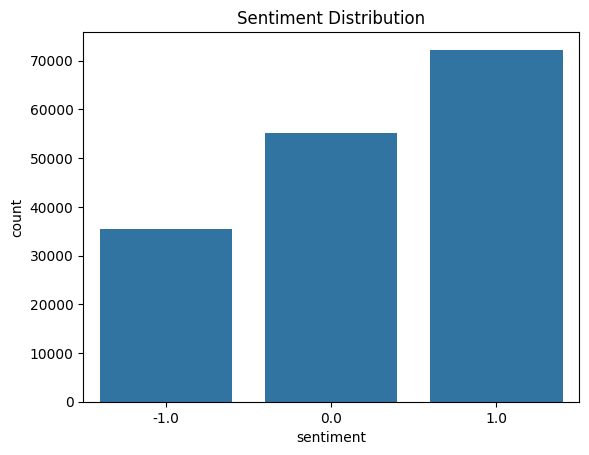

In [23]:
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Distribution")
plt.show()

In [24]:
df.isnull().sum()

tweet            4
sentiment        7
cleaned_tweet    0
dtype: int64

In [25]:
df.info

<bound method DataFrame.info of                                                     tweet  sentiment  \
0       when modi promised “minimum government maximum...       -1.0   
1       talk all the nonsense and continue all the dra...        0.0   
2       what did just say vote for modi  welcome bjp t...        1.0   
3       asking his supporters prefix chowkidar their n...        1.0   
4       answer who among these the most powerful world...        1.0   
...                                                   ...        ...   
162975  why these 456 crores paid neerav modi not reco...       -1.0   
162976  dear rss terrorist payal gawar what about modi...       -1.0   
162977  did you cover her interaction forum where she ...        0.0   
162978  there big project came into india modi dream p...        0.0   
162979  have you ever listen about like gurukul where ...        1.0   

                                            cleaned_tweet  
0       when modi promised minimum governme

In [26]:
df.to_csv("cleaned_twitter_Data.csv", index=False)